# Exploring ArqMath

### Number of total unique formulae

In [2]:
import json
import os
from tqdm import tqdm

In [3]:
root_dir = "/data/szr207/dataset/ArqMath/jsons/"

exp_ques_f = "uniqueExpr_ques.json"
exp_ans_f = "uniqueExpr_ans.json"

with open(os.path.join(root_dir,exp_ques_f)) as json_file:
    data_q = json.load(json_file)
    print("Number of Unique ids in questions: ",len(data_q.keys()))

with open(os.path.join(root_dir,exp_ans_f)) as json_file:
    data_a = json.load(json_file)
    print("Number of Unique ids in answers: ",len(data_a.keys()))

Number of Unique ids in questions:  3403039
Number of Unique ids in answers:  5841761


In [ ]:
set_exp_q = set()
set_exp_a = set()
set_all = set()


for i in tqdm(data_a):
    set_all.add(data_a[i])
for i in tqdm(data_q):
    set_all.add(data_q[i])

print("Number of Unique expressions in questions: ",len(list(set_all)))
print("Number of Unique expressions in answers: ",len(list(set_exp_a)))

## Text Representations

### FastText

In [ ]:
ques_f = 'questions_file.jsonl'
ans_f = 'answers_file.jsonl'

import jsonlines

list_raw_text = []

with jsonlines.open(os.path.join(root_dir,ques_f)) as reader:
    for obj in reader:
        list_raw_text.append(obj['Title'] + ' ' + obj['Body'])

        
with jsonlines.open(os.path.join(root_dir,ans_f)) as reader:
    for obj in reader:
        list_raw_text.append(obj['Body'])


In [4]:
list_raw_text=[]
with open(os.path.join(root_dir,'questions.dump.txt'), 'r') as filehandle:
#     try:
    for line in filehandle:
        list_raw_text.append(line.rstrip())
    

In [5]:
len(list_raw_text)

2477506

In [ ]:
with open(os.path.join(root_dir,'questions.dump.txt'), 'w') as filehandle:
#     try:
    for line in tqdm(list_raw_text):
        try:
            filehandle.write(line)
            filehandle.write('\n')
        except :
            print('Exception')

In [6]:
words = []
for ii in tqdm(list_raw_text):
    words.append(ii.replace('\udbc0','').split(" "))

100%|██████████| 2477506/2477506 [00:52<00:00, 47441.26it/s] 


In [7]:
n_gram_all = []

for word in tqdm(words):
    # get n-grams for the instance
    n_gram = []
    for i in range(len(word)-2+1):
        n_gram.append("".join(word[i:i+2]))
    n_gram_all.append(n_gram)

100%|██████████| 2477506/2477506 [02:31<00:00, 16356.08it/s]


In [8]:
from sklearn.feature_extraction.text import HashingVectorizer

# hash vectorizer instance
hvec = HashingVectorizer(lowercase=False, analyzer=lambda l:l, n_features=2**12)

# features matrix X
X = hvec.fit_transform(n_gram_all)

from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test = train_test_split(X.toarray(), test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

X_train size: 1982004
X_test size: 495502 



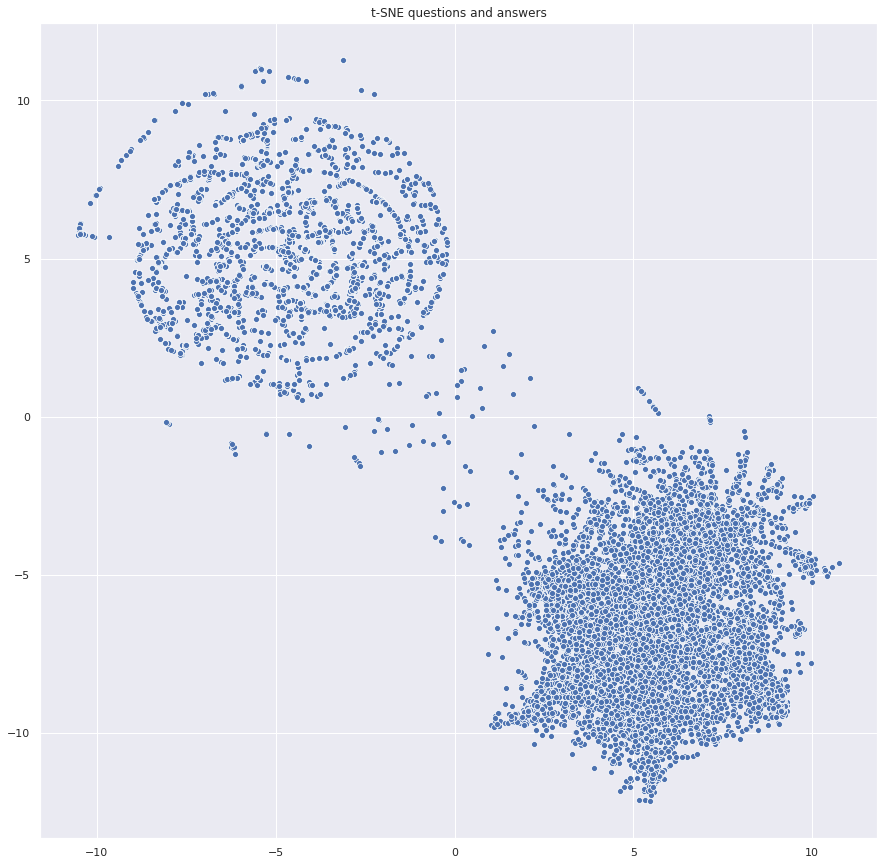

In [26]:
# from sklearn.manifold import TSNE
from MulticoreTSNE import MulticoreTSNE as TSNE
import matplotlib.pyplot as plt
plt.style.use('ggplot')

tsne = TSNE(n_jobs=20)
mi = 20000
ma = 40000

# tsne = TSNE(verbose=1, perplexity=5)
X_embedded = tsne.fit_transform(X_train[mi:ma])

import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)

plt.title("t-SNE questions and answers")
# plt.savefig("plots/t-sne_covid19.png")
plt.show()

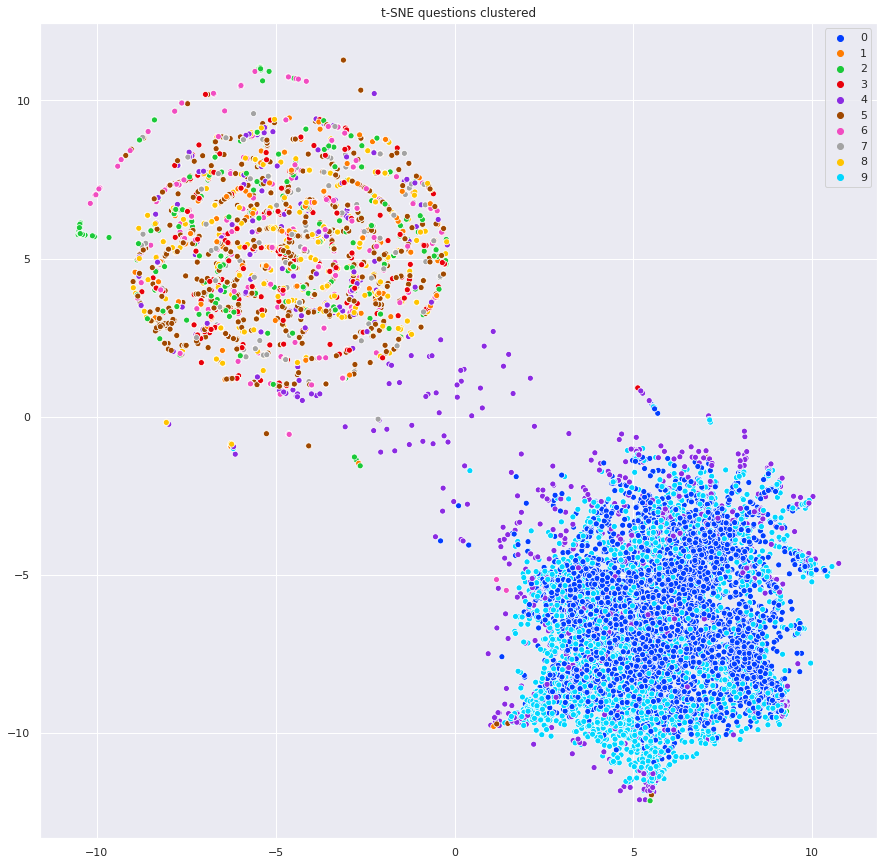

In [27]:
from sklearn.cluster import KMeans

k = 10
kmeans = KMeans(n_clusters=k, n_jobs=20, verbose=10)
y_pred = kmeans.fit_predict(X_train[mi:ma])

y_train = y_pred
y_test = kmeans.predict(X_test)
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE questions clustered")
# plt.savefig("plots/t-sne_covid19_label.png")
plt.show()


In [18]:
y_pred.shape

(20000,)

In [23]:
X_embedded[:,1].shape

(20000,)

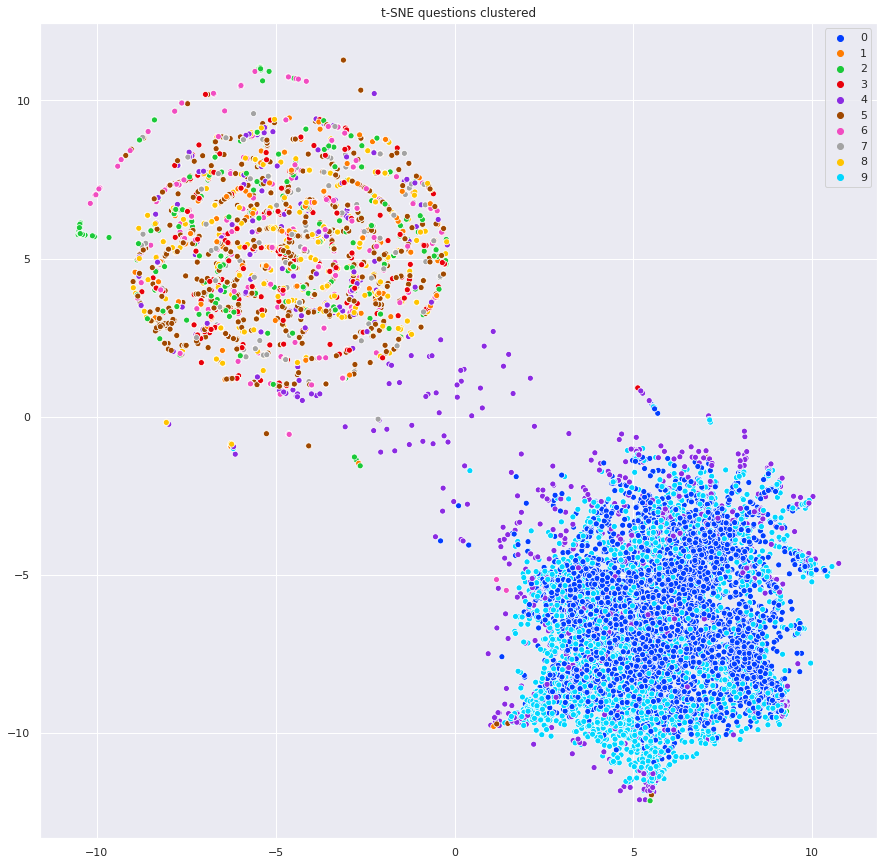

In [28]:

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE questions clustered")
# plt.savefig("plots/t-sne_covid19_label.png")
plt.show()


In [29]:
print("hello")

hello
